In [2]:
%pylab inline
rc('font',**{'family':'sans-serif','sans-serif':['Latin Modern']})
rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


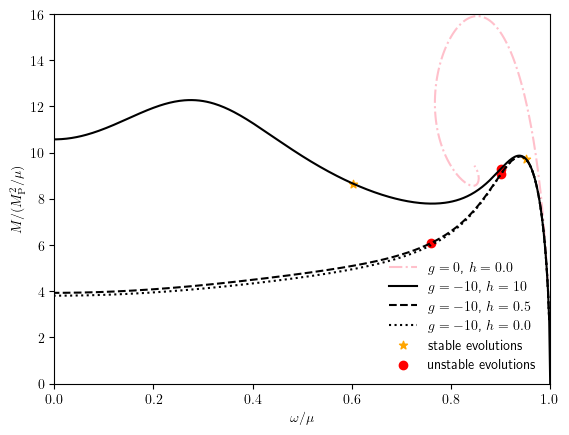

In [91]:
M0= 8*pi * loadtxt("./solutions_varying_omega/g-10.00_h10.00/MKomar.dat")
omega0=loadtxt("./solutions_varying_omega/g-10.00_h10.00/omega.dat")

M1= 8*pi * loadtxt("./solutions_varying_omega/g-10.00_h0.50/MKomar.dat")
omega1=loadtxt("./solutions_varying_omega/g-10.00_h0.50/omega.dat")

M2= 8*pi * loadtxt("./solutions_varying_omega/g-10.00_h0.00/MKomar.dat")
omega2=loadtxt("./solutions_varying_omega/g-10.00_h0.00/omega.dat")

M3= 8*pi * loadtxt("./g0.00_h0.00/MKomar.dat")
omega3=loadtxt("./g0.00_h0.00/omega.dat")


xlabel(r"$\omega/\mu$")
ylabel(r"$M/(M_{\rm P}^2/\mu)$")

xlim(0,1)
ylim(0,16)

M0=append([0], M0)
omega0=append([1],omega0)

plot(omega3, M3, color="pink", linestyle="-.", label=r"$g=0$,  $h=0.0$")
plot(omega0, M0, color="k", linestyle="-", label=r"$g=-10$,  $h=10$")
plot(omega1, M1, color="k", linestyle="--", label=r"$g=-10$,  $h=0.5$")
plot(omega2, M2, color="k", linestyle=":", label=r"$g=-10$,  $h=0.0$")


scatter(omega1[19],M1[19], color="orange", marker="*", label="stable evolutions")
scatter(omega1[39],M1[39], color="red", marker="o", label="unstable evolutions")
scatter(omega0[40],M0[40], color="red", marker="o")
scatter(omega2[95],M1[95], color="red", marker="o")
scatter(omega0[159],M0[159], color="orange", marker="*")

legend(loc="lower right", frameon=False)

savefig("M-omega.pdf")

In [67]:
omega1[159]

0.6003007518796992

array([1.        , 0.998     , 0.99549875, 0.99299749, 0.99049624,
       0.98799499, 0.98549373, 0.98299248, 0.98049123, 0.97798997,
       0.97548872, 0.97298747, 0.97048622, 0.96798496, 0.96548371,
       0.96298246, 0.9604812 , 0.95797995, 0.9554787 , 0.95297744,
       0.95047619, 0.94797494, 0.94547368, 0.94297243, 0.94047118,
       0.93796992, 0.93546867, 0.93296742, 0.93046617, 0.92796491,
       0.92546366, 0.92296241, 0.92046115, 0.9179599 , 0.91545865,
       0.91295739, 0.91045614, 0.90795489, 0.90545363, 0.90295238,
       0.90045113, 0.89794987, 0.89544862, 0.89294737, 0.89044612,
       0.88794486, 0.88544361, 0.88294236, 0.8804411 , 0.87793985,
       0.8754386 , 0.87293734, 0.87043609, 0.86793484, 0.86543358,
       0.86293233, 0.86043108, 0.85792982, 0.85542857, 0.85292732,
       0.85042607, 0.84792481, 0.84542356, 0.84292231, 0.84042105,
       0.8379198 , 0.83541855, 0.83291729, 0.83041604, 0.82791479,
       0.82541353, 0.82291228, 0.82041103, 0.81790977, 0.81540

In [2]:
N=17
archivo="/home/landau/Codes/KADATH/Anhui/Kadath/SelfInteractingBS/bin/"



dominios=8
r1_b=1.
r2_b=2.
r3_b=4.
r4_b=8.
r5_b=16.
r6_b=32.
r7_b=64.


In [3]:
def cut_Kadath(func_dat):
    YY=zeros((N*dominios,N))
    for ll in range(dominios):
        YY[N*ll:N*(ll+1),:]=loadtxt(archivo+func_dat, skiprows=4*(ll+1)+(N+1)*ll, max_rows=N, usecols=(arange(N)+2))
    return YY

def extract_coef(dom,FUNC):    #only for local use
    return FUNC[N*dom:N*(dom+1),:]
x=linspace(-1,1,N)            ##
r0=r1_b*x
r1=0.5*(r2_b-r1_b)*x+0.5*(r2_b+r1_b)
r2=0.5*(r3_b-r2_b)*x+0.5*(r3_b+r2_b)
r3=0.5*(r4_b-r3_b)*x+0.5*(r4_b+r3_b)
r4=0.5*(r5_b-r4_b)*x+0.5*(r5_b+r4_b)
r5=0.5*(r6_b-r5_b)*x+0.5*(r6_b+r5_b)
r6=0.5*(r7_b-r6_b)*x+0.5*(r7_b+r6_b)
r7=2*r7_b/(1.-x+1e-9)           ##

In [4]:
PHI=cut_Kadath("phi.dat")
LAPSE=cut_Kadath("lapse.dat")
A=cut_Kadath("bigA.dat")
B=cut_Kadath("bigB.dat")
W=cut_Kadath("W.dat")

PHI

array([[ 5.67662e-01, -2.27223e-01,  2.99855e-02, ..., -2.80078e-11,
         4.24641e-12,  4.84612e-14],
       [-1.76049e-17,  5.69998e-18,  7.82199e-18, ..., -8.35938e-18,
        -4.97360e-18, -4.09401e-19],
       [ 6.96672e-18,  6.70152e-18,  5.82624e-18, ...,  1.24831e-18,
        -4.84398e-18,  1.45241e-18],
       ...,
       [-1.15256e-31,  2.26796e-31, -2.15996e-31, ..., -6.40512e-33,
         9.36591e-33, -7.56809e-33],
       [-8.57743e-32,  1.68809e-31, -1.60845e-31, ..., -4.86271e-33,
         7.32123e-33, -5.98225e-33],
       [-5.36521e-33,  1.05343e-32, -9.96690e-33, ..., -2.06087e-34,
         2.10445e-34, -1.45157e-34]])

In [5]:
def Cheb_serie(coef,xx,yy):  #dos dimensiones
    sum_=0
    for ii in range(len(coef[:,0])):
        for jj in range(len(coef[0,:])):
            sum_ += coef[ii,jj] * cos(2*ii * xx) * cos(jj * arccos(yy))
    return sum_

def Cheb_serie_even(coef,xx,yy):  #dos dimensiones
    sum_=0
    for ii in range(len(coef[:,0])):
        for jj in range(len(coef[0,:])):
            sum_ += coef[ii,jj] * cos(2*ii * xx) * cos(2 * jj * arccos(yy))
    return sum_

def Cheb_serie_odd(coef,xx,yy):  #dos dimensiones
    sum_=0
    for ii in range(len(coef[:,0])):
        for jj in range(len(coef[0,:])):
            sum_ += coef[ii,jj] * cos(2*ii * xx) * cos((2 * jj + 1) * arccos(yy))
    return sum_


def antiCheb_serie(coef,xx,yy):  #dos dimensiones
    sum_=0
    for ii in range(len(coef[:,0])):
        for jj in range(len(coef[0,:])):
            sum_ += coef[ii,jj] * cos((2*ii+1) * xx) * cos(jj * arccos(yy))
    return sum_

def antiCheb_serie_even(coef,xx,yy):  #dos dimensiones
    sum_=0
    for ii in range(len(coef[:,0])):
        for jj in range(len(coef[0,:])):
            sum_ += coef[ii,jj] * cos((2*ii+1) * xx) * cos(2 * jj * arccos(yy))
    return sum_

def antiCheb_serie_odd(coef,xx,yy):  #dos dimensiones
    sum_=0
    for ii in range(len(coef[:,0])):
        for jj in range(len(coef[0,:])):
            sum_ += coef[ii,jj] * cos((2*ii+1) * xx) * cos((2 * jj + 1) * arccos(yy))
    return sum_


def testCheb_serie(coef,xx,yy):  #dos dimensiones
    sum_=0
    for ii in range(len(coef[:,0])):
        for jj in range(len(coef[0,:])):
            sum_ += coef[ii,jj] * sin((2*ii+1) * xx) * cos(jj * arccos(yy))
    return sum_

def testCheb_serie_even(coef,xx,yy):  #dos dimensiones
    sum_=0
    for ii in range(len(coef[:,0])):
        for jj in range(len(coef[0,:])):
            sum_ += coef[ii,jj] * sin((2*ii+1) * xx) * cos(2 * jj * arccos(yy))
    return sum_

def testCheb_serie_odd(coef,xx,yy):  #dos dimensiones
    sum_=0
    for ii in range(len(coef[:,0])):
        for jj in range(len(coef[0,:])):
            sum_ += coef[ii,jj] * sin((2*ii+1) * xx) * cos((2 * jj + 1) * arccos(yy))
    return sum_

(0.0, 20.0)

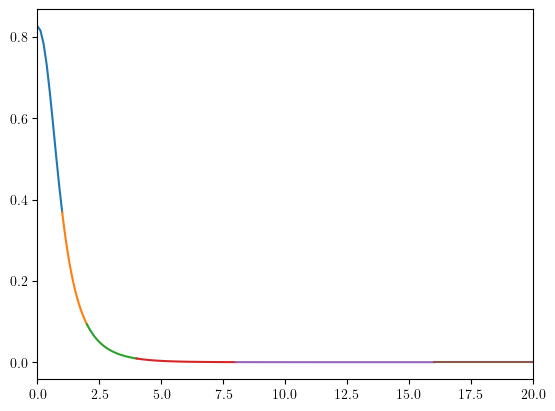

In [6]:
theta_fija = 90 * (pi/180.0) #grados
y=theta_fija
plot(r0,Cheb_serie_even(extract_coef(0,PHI),y,x))
plot(r1,Cheb_serie(extract_coef(1,PHI),y,x))
plot(r2,Cheb_serie(extract_coef(2,PHI),y,x))
plot(r3,Cheb_serie(extract_coef(3,PHI),y,x))
plot(r4,Cheb_serie(extract_coef(4,PHI),y,x))
plot(r5,Cheb_serie(extract_coef(5,PHI),y,x))
plot(r6,Cheb_serie(extract_coef(6,PHI),y,x))
plot(r7,Cheb_serie(extract_coef(7,PHI),y,x))



xlim(0,20)

In [7]:
max(antiCheb_serie(extract_coef(3,PHI),y,x))

5.499452467043936e-19

In [8]:
antiCheb_serie(extract_coef(3,PHI),y,x)

array([5.49945247e-19, 4.21564183e-19, 3.24336308e-19, 2.50351042e-19,
       1.93813350e-19, 1.50444644e-19, 1.17063964e-19, 9.12917444e-20,
       7.13380624e-20, 5.58498465e-20, 4.37996884e-20, 3.44043101e-20,
       2.70643672e-20, 2.13197268e-20, 1.68160571e-20, 1.32797377e-20,
       1.04989326e-20])

(0.0, 20.0)

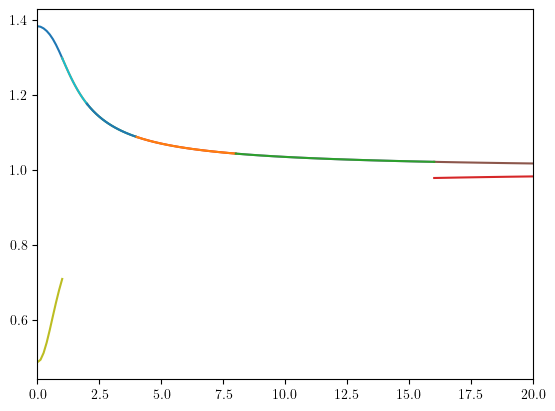

In [9]:
plot(r0,Cheb_serie_even(extract_coef(0,A),y,x))
plot(r1,Cheb_serie(extract_coef(1,A),y,x))
plot(r2,Cheb_serie(extract_coef(2,A),y,x))
plot(r3,Cheb_serie(extract_coef(3,A),y,x))
plot(r4,Cheb_serie(extract_coef(4,A),y,x))
plot(r5,Cheb_serie(extract_coef(5,A),y,x))
plot(r6,Cheb_serie(extract_coef(6,A),y,x))
plot(r7,Cheb_serie(extract_coef(7,A),y,x))

plot(r0,Cheb_serie_even(extract_coef(0,LAPSE),y,x))
plot(r1,Cheb_serie(extract_coef(1,B),y,x))
plot(r2,Cheb_serie(extract_coef(2,B),y,x))
plot(r3,Cheb_serie(extract_coef(3,B),y,x))
plot(r4,Cheb_serie(extract_coef(4,B),y,x))
plot(r5,Cheb_serie(extract_coef(5,LAPSE),y,x))
plot(r6,Cheb_serie(extract_coef(6,LAPSE),y,x))
plot(r7,Cheb_serie(extract_coef(7,LAPSE),y,x))

xlim(0,20)

In [10]:
Cheb_serie(extract_coef(3,B),y,x)-Cheb_serie(extract_coef(3,A),y,x)

array([-2.44249065e-15, -3.41948692e-14,  4.30766534e-14, -1.31006317e-14,
       -4.90718577e-14,  6.59472477e-14,  7.77156117e-15, -7.12763182e-14,
        2.15383267e-14,  5.92859095e-14, -4.15223411e-14, -3.26405569e-14,
        5.08482145e-14, -1.35447209e-14, -1.59872116e-14,  1.50990331e-14,
        1.11022302e-15])

In [11]:
MATRIX=zeros((N*dominios,N*4))
MATRIX[:,0:N]=PHI
MATRIX[:,N:2*N]=LAPSE
MATRIX[:,2*N:3*N]=A
MATRIX[:,3*N:4*N]=B

# FOR ROTATING
#MATRIX=zeros((N*dominios,N*5))
#MATRIX[:,0:N]=PHI
#MATRIX[:,N:2*N]=LAPSE
#MATRIX[:,2*N:3*N]=A
#MATRIX[:,3*N:4*N]=B
#MATRIX[:,4*N:5*N]=W

In [12]:
savetxt("omega0p6_g-10_h10.dat",MATRIX)
#savetxt("omega0p9_g-10_h0p5.dat",MATRIX)
#savetxt("omega0p95_g-10_h0p5.dat",MATRIX)
#savetxt("omega0p7584_g-10_h0p5.dat",MATRIX)
#savetxt("omega0p9_g0_h0.dat",MATRIX)

In [13]:
MATRIX

array([[ 5.67662e-01, -2.27223e-01,  2.99855e-02, ...,  6.76599e-11,
        -1.55541e-11,  1.04450e-12],
       [-1.76049e-17,  5.69998e-18,  7.82199e-18, ..., -3.88569e-15,
         3.15477e-15, -2.97668e-16],
       [ 6.96672e-18,  6.70152e-18,  5.82624e-18, ..., -3.73815e-15,
         3.16490e-15, -3.27818e-16],
       ...,
       [-1.15256e-31,  2.26796e-31, -2.15996e-31, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [-8.57743e-32,  1.68809e-31, -1.60845e-31, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [-5.36521e-33,  1.05343e-32, -9.96690e-33, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00]])